# Algoritmos Evolutivos e Genéticos aplicado ao problema do caxeiro viajante

## Problema

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Número de cidades
N = 10

# Distancias entre cidades
D = np.random.uniform(low=0.1, high=5, size=(N,N))

# Distancia da cidade para ela mesma = 0
for i in range(N):
    D[i,i] = 0
    
    
#Função para plotar o status gerado pelos algoritmos
def plot_stats(stats):
    plt.plot(stats[:, 0].astype('int'), stats[:, 1])
    plt.xlabel('Gerações')
    plt.ylabel('Fitness')
    plt.show()

### Evolutionary Steady State

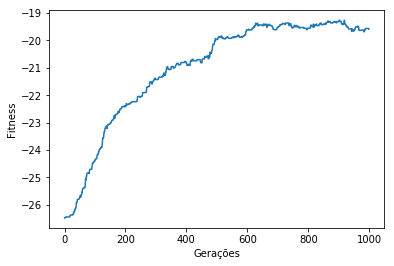

In [82]:
# Calcula o fitness para um candidato.
def _fitness(candidate, distances):
    dist = 0
    n = candidate.size
    for i in range(n-1):
        dist = dist + distances[candidate[i], candidate[i+1]]
    
    dist = dist + distances[candidate[n-1], candidate[0]]
    
    return -dist

# Realiza a troca de 2 posições no vetor de candidatos.
def mutation(candidate):
    a = np.random.randint(candidate.size)
    b = np.random.randint(candidate.size)
    candidate[a], candidate[b] = candidate[b], candidate[a]

    return candidate

# Modelo 1 de algoritmo evolutivo - estado estácionario.
def evo_steady_state(distances, pop_size=100, ngenerations=1000):
    # Número de cidades    
    ncities = distances.shape[0]
    # Criação da população    
    population = np.zeros((pop_size, ncities), dtype=np.int32)
    # Fitness
    fitness = np.zeros(pop_size)
    
    # Cria array com as cidades
    cities = np.arange(ncities)

    # Gera população inicial e calcula seu fitness
    for i in range(pop_size):
        np.random.shuffle(cities)
        population[i, :] = cities.copy()
        fitness[i] = _fitness(population[i, :], distances)
        
        
    statistics = np.empty((0,2))
    # Para cada geração
    for i in range(ngenerations):
        # Escolhe aleatoriamente um pai, e cria um filho a partir de sua mutação 
        parent = np.random.randint(pop_size)
        child = population[parent, :]
        child = mutation(child)

        # Escolhe aleatoriamente um individuo da população.        
        deathrow = np.random.randint(pop_size)
        # Se o Fitness do filho for maior, substitui.        
        if(_fitness(child, distances) > _fitness(population[deathrow, :], distances)):
            population[deathrow, :] = child
            fitness[deathrow] = _fitness(child, distances)
       
        # Cria um vetor de estatística para visualização da evolução do fitness com o passar das gerações.         
        s = np.array([i, fitness.mean()]).reshape((1,2))
        statistics = np.append(statistics, s, axis=0)
        
    return (population, fitness, statistics)

pop, fit, stats = evo_steady_state(D)
plot_stats(stats)

## Evolutionary Batch

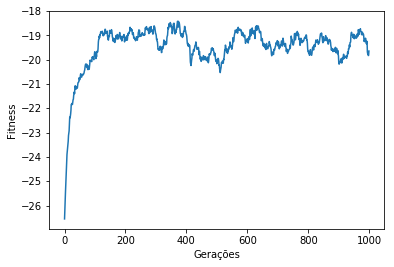

In [84]:
# Calcula o fitness para um candidato.
def _fitness(candidate, distances):
    dist = 0
    n = candidate.size
    for i in range(n-1):
        dist = dist + distances[candidate[i], candidate[i+1]]
    
    dist = dist + distances[candidate[n-1], candidate[0]]
    
    return -dist

# Realiza a troca de 2 posições no vetor de candidatos.
def mutation(candidate):
    a = np.random.randint(candidate.size)
    b = np.random.randint(candidate.size)
    candidate[a], candidate[b] = candidate[b], candidate[a]

    return candidate

# Modelo 2 de algoritmo evolutivo
def evo_batch(distances, pop_size=100, ngenerations=1000, k=10):
    # Número de cidades    
    ncities = distances.shape[0]
    # Criação da população    
    population = np.zeros((pop_size, ncities), dtype=np.int32)
    # Fitness
    fitness = np.zeros(pop_size)
    
    # Cria array com as cidades
    cities = np.arange(ncities)

    # Gera população inicial e calcula seu fitness
    for i in range(pop_size):
        np.random.shuffle(cities)
        population[i, :] = cities.copy()
        fitness[i] = _fitness(population[i, :], distances)
        
        
    statistics = np.empty((0,2))
    # Para cada geração
    for i in range(ngenerations):
        for j in range(k):
            # Escolhe aleatoriamente um pai, e cria um filho a partir de sua mutação 
            parent = np.random.randint(pop_size)
            child = population[parent, :]
            child = mutation(child)


            # Escolhe aleatoriamente um individuo da população.        
            deathrow = np.random.randint(pop_size)
            # Se o Fitness do filho for maior, substitui.        
            if(_fitness(child, distances) > _fitness(population[deathrow, :], distances)):
                population[deathrow, :] = child
                fitness[deathrow] = _fitness(child, distances)
       
        # Cria um vetor de estatística para visualização da evolução do fitness com o passar das gerações.         
        s = np.array([i, fitness.mean()]).reshape((1,2))
        statistics = np.append(statistics, s, axis=0)
        
    return (population, fitness, statistics)

pop, fit, stats = evo_batch(D)
plot_stats(stats)

## Evolutionary Programming

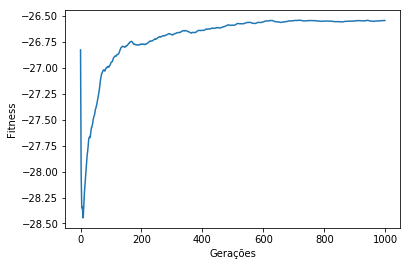

In [87]:
# Calcula o fitness para um candidato.
def _fitness(candidate, distances):
    dist = 0
    n = candidate.size
    for i in range(n-1):
        dist = dist + distances[candidate[i], candidate[i+1]]
    
    dist = dist + distances[candidate[n-1], candidate[0]]
    
    return -dist

# Realiza a troca de 2 posições no vetor de candidatos.
def mutation(candidate):
    a = np.random.randint(candidate.size)
    b = np.random.randint(candidate.size)
    candidate[a], candidate[b] = candidate[b], candidate[a]

    return candidate

# Modelo 3 de algoritmo evolutivo - Programação evolutiva.
def evo_programming(distances, pop_size=100, ngenerations=1000):
    # Número de cidades    
    ncities = distances.shape[0]
    # Criação da população    
    population = np.zeros((pop_size, ncities), dtype=np.int32)
    # Fitness
    fitness = np.zeros(pop_size)
    
    # Cria array com as cidades
    cities = np.arange(ncities)

    # Gera população inicial e calcula seu fitness
    for i in range(pop_size):
        np.random.shuffle(cities)
        population[i, :] = cities.copy()
        fitness[i] = _fitness(population[i, :], distances)
        
        
    statistics = np.empty((0,2))
    # Para cada geração
    for i in range(ngenerations):
        # Criando nova população de filhos
        children = np.zeros((pop_size, ncities), dtype=np.int32)
        fit_children = np.zeros(pop_size)
        
        # Gera a população de filhos
        for j in range(pop_size):
            children[j, :] = mutation(population[j, :])
            fit_children[j] = _fitness(children[j, :], distances)
            
        # Concatena pais e filhos.
        unified = np.append(population, children, axis=0)
        fit_unified = np.append(fitness, fit_children, axis=0)

        # Cria nova população com os melhores dentre pais e filhos        
        idx = np.argsort(fit_unified)
        population = unified[idx, :]
        fitness = fit_unified[idx]
       
        # Cria um vetor de estatística para visualização da evolução do fitness com o passar das gerações.         
        s = np.array([i, fitness.mean()]).reshape((1,2))
        statistics = np.append(statistics, s, axis=0)
        
    return (population, fitness, statistics)

pop, fit, stats = evo_programming(D)
plot_stats(stats)